# import all required libraries 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pyreadstat  # This reads .sav files

# import sav file provided by Dr. Shurendra Ghimire Sir (I renamed without space to make it error free)
# File should be in the same folder or include the full address location

In [3]:
df, meta = pyreadstat.read_sav('SPSS-Ready-Data.sav')

# at first i was unclear what was actually inside that file so i exported it to csv format

In [4]:
df.to_csv('exported_data.csv', index=False)
print("Export complete. File saved as 'exported_data.csv'")

Export complete. File saved as 'exported_data.csv'


# To measure satisfaction there was no particular satisfaction field which could measure the satisfaction so i create a satisfaction list on various variables which we can change later on. [24 variables were used to measure satisfaction.]

In [5]:
satisfaction_cols = [
    '@14.Realworld_Use',
    '@15.Thecourse_uptodate',
    '@16.Thecoursecontribute_careerplans',
    '@17.Course_theoryandpractical',
    '@18.Teacher_subjectareas',
    '@19.Classroomteaching',
    '@20.Teachers_available',
    '@21.Practical_effective',
    '@22.Teaching_practical',
    '@23.Thelibrary_resource',
    '@24.Com_Internet',
    '@25.Thecampus_Software',
    '@26.Projector',
    '@27.Campus_support_assignmentsandpr',
    '@28.staff_cooperativeandhelpful',
    '@29.Toiletsandsanitation',
    '@30.Drinkingwater',
    '@31.canteen',
    '@32.ECA',
    '@33.Internalassessment',
    '@34.Teachers_feedback',
    '@35.Makeupexams',
    '@36.Finalexams',
    '@37.Results_published'
]

# an 'average satisfaction' column per respondent

In [6]:
df['Avg_Satisfaction'] = df[satisfaction_cols].mean(axis=1)

# Group by semester

In [7]:
semester_satisfaction = df.groupby('@3.Semester')['Avg_Satisfaction'].mean().sort_index()

# Lets see by printing

In [8]:
# Convert to DataFrame
semester_satisfaction_df = semester_satisfaction.reset_index()

# Rename columns (optional)
semester_satisfaction_df.columns = ['Semester', 'Average Satisfaction']

print("Average Satisfaction by Semester:")
print(semester_satisfaction_df)

Average Satisfaction by Semester:
   Semester  Average Satisfaction
0       2.0              3.312500
1       3.0              3.401515
2       5.0              3.505208
3       7.0              3.416667
4       8.0              3.362745


# Visualize with matplotlib [added circle in vertices]

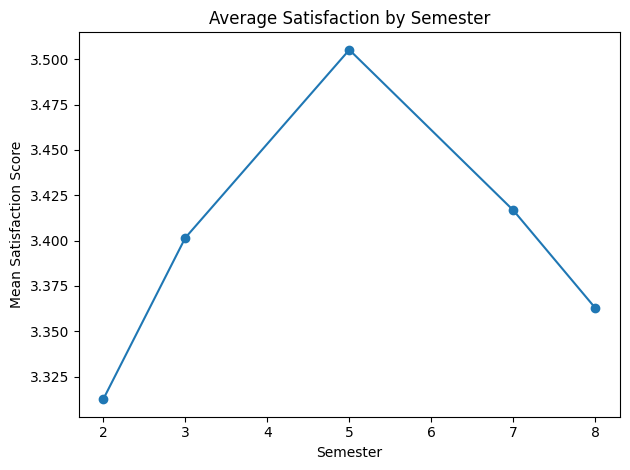

In [9]:
semester_satisfaction.plot(kind='line', marker = 'o')
plt.title("Average Satisfaction by Semester")
plt.xlabel("Semester")
plt.ylabel("Mean Satisfaction Score")
plt.tight_layout()
plt.show()

# Which semester is the most satisfied and which is the least, in comparison?

based on the data to answer the first question :

Among the surveyed students, Semester 5 reported the highest average satisfaction (M = 3.51), while Semester 2 reported the lowest (M = 3.31). This suggests that students in Semester 5 are more satisfied with their academic and institutional experience compared to other semesters.

# 2: Find the significant correlations among responses.

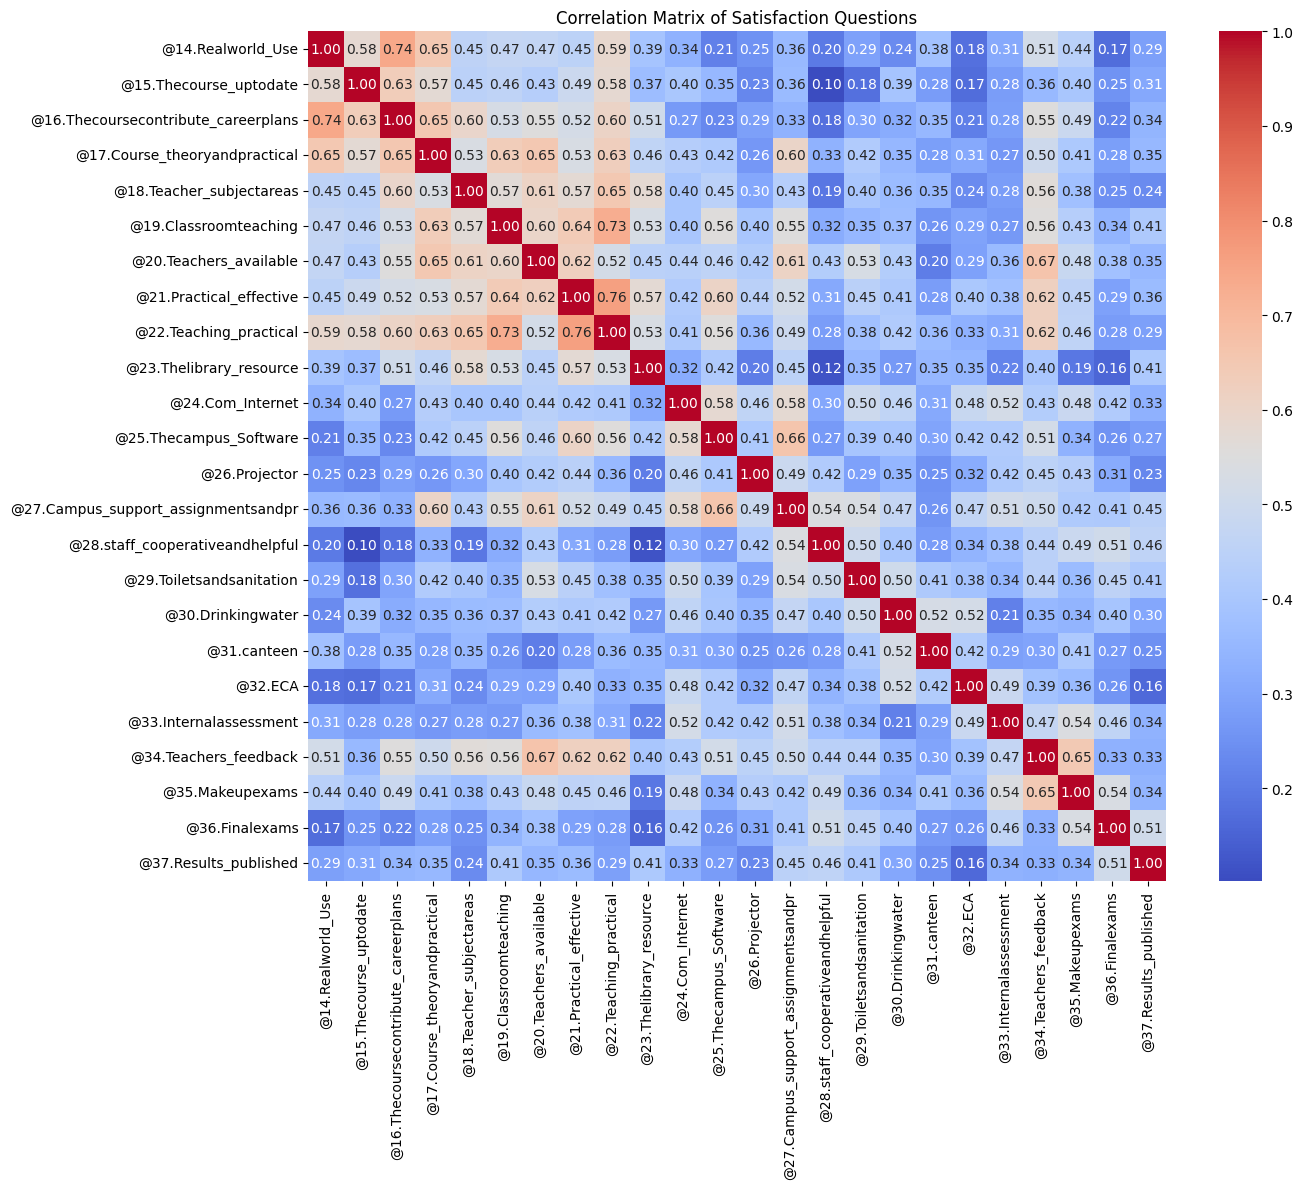

In [10]:
corr_matrix = df[satisfaction_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Satisfaction Questions")
plt.tight_layout()
plt.show()

🔵 Blue for positive correlation

🔴 Red (or darker) for negative correlation

⚪️ White/light color near zero = no correlation

Color intensity indicates the strength of the correlation

# Find Significant Correlations

In [11]:
print("\nSignificant Correlations (p < 0.05):")
for i in range(len(satisfaction_cols)):
    for j in range(i + 1, len(satisfaction_cols)):  # Avoid repeating pairs
        col1 = satisfaction_cols[i]
        col2 = satisfaction_cols[j]

        # Drop NA and align data
        x = df[col1]
        y = df[col2]
        x, y = x.dropna(), y.dropna()
        n = min(len(x), len(y))  # Equal length check
        if n > 10:  # Ensure enough data points
            r, p = pearsonr(x[:n], y[:n])
            if p < 0.05:
                print(f"{col1} & {col2} → r = {r:.2f}, p = {p:.4f}")



Significant Correlations (p < 0.05):
@14.Realworld_Use & @15.Thecourse_uptodate → r = 0.58, p = 0.0000
@14.Realworld_Use & @16.Thecoursecontribute_careerplans → r = 0.74, p = 0.0000
@14.Realworld_Use & @17.Course_theoryandpractical → r = 0.65, p = 0.0000
@14.Realworld_Use & @18.Teacher_subjectareas → r = 0.45, p = 0.0000
@14.Realworld_Use & @19.Classroomteaching → r = 0.47, p = 0.0000
@14.Realworld_Use & @20.Teachers_available → r = 0.47, p = 0.0000
@14.Realworld_Use & @21.Practical_effective → r = 0.45, p = 0.0000
@14.Realworld_Use & @22.Teaching_practical → r = 0.59, p = 0.0000
@14.Realworld_Use & @23.Thelibrary_resource → r = 0.39, p = 0.0001
@14.Realworld_Use & @24.Com_Internet → r = 0.34, p = 0.0008
@14.Realworld_Use & @25.Thecampus_Software → r = 0.21, p = 0.0384
@14.Realworld_Use & @26.Projector → r = 0.25, p = 0.0134
@14.Realworld_Use & @27.Campus_support_assignmentsandpr → r = 0.36, p = 0.0003
@14.Realworld_Use & @29.Toiletsandsanitation → r = 0.29, p = 0.0042
@14.Realworld_U

A Pearson correlation analysis was conducted on 24 Likert-scale satisfaction variables. A correlation coefficient (r) indicates the strength and direction of a relationship. Statistical significance was assessed using a p-value threshold of 0.05.

### 📊 Strong Positive Correlations
Several pairs showed strong positive relationships (r > 0.60), indicating that when satisfaction with one aspect increases, the other tends to increase too.

| Variable Pair                                     | Correlation (r) | Significance (p) |
|--------------------------------------------------|------------------|------------------|
| Career plans & Theory/practical balance          | 0.65             | < 0.001          |
| Practical teaching & Practical effectiveness     | 0.76             | < 0.001          |
| Teachers' feedback & Makeup exams                | 0.65             | < 0.001          |
| Teaching quality & Teaching practicality         | 0.73             | < 0.001          |
| Teacher availability & Teacher feedback          | 0.67             | < 0.001          |


## Other few correlations

### Moderate Correlations with Broader Facilities

Moderate but significant correlations (r = 0.30–0.50) were found between academic factors and campus facilities:

- Canteen, sanitation, internet, and water access showed meaningful correlations with academic satisfaction (e.g., real-world use, teaching practicality).
- This implies that student satisfaction isn’t just academic; infrastructure contributes to overall perception.

### Noteworthy Observations
- @14.Realworld_Use (real-world application of the course) was significantly correlated with 17 different items, showing it is a central indicator of satisfaction.
- @16.Thecoursecontribute_careerplans also appeared as a strong hub variable.
- Variables like canteen, drinking water, and internet—though seemingly peripheral—were repeatedly correlated with core academic experiences.
